In [15]:
import pandas as pd 
import csv
import sys
import numpy as np
import decimal 
import scipy.stats as stats
import sklearn.datasets as datasets
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn_evaluation.plot as plot
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
pd.set_option('display.max_colwidth', -1)

plt.rcParams["figure.figsize"] = (20,20)

## Reading the tsv files of test and training dataset

In [7]:
test_dataset = pd.read_csv("A3_test_dataset.tsv",sep='\t')
train_dataset = pd.read_csv("A3_training_dataset.tsv",sep='\t')
h = .02
train_dataset.columns



Index(['overlaps_sQTLs', 'overlaps_sQTLs_4_same_gene', 'gene_has_sQTLs', 'AQR',
       'SF3B4', 'PRPF8', 'RBM22', 'BUD13', 'EFTUD2', 'XRN2', 'H3K36me3', 'AAA',
       'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG',
       'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA',
       'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG',
       'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA',
       'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG',
       'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA',
       'TTC', 'TTG', 'TTT', 'group'],
      dtype='object')

In [5]:
#tempwith2features = train_dataset[['TCT', 'TGC','CGT','group']]
#s = sns.pairplot(tempwith2features, hue="group",palette="husl")


In [3]:
train_dataset

,overlaps_sQTLs,overlaps_sQTLs_4_same_gene,gene_has_sQTLs,AQR,SF3B4,PRPF8,RBM22,BUD13,EFTUD2,XRN2,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,group
0,0,0,1,0,0,1,1,0,0,0,...,0.012987,0.012987,0.038961,0.012987,0.051948,0.012987,0.051948,0.025974,0.077922,0
1,1,1,1,0,0,0,1,1,0,0,...,0.031237,0.021658,0.014786,0.028322,0.027072,0.018117,0.026239,0.025614,0.059975,1
2,0,0,0,1,0,1,0,1,1,0,...,0.016766,0.029142,0.009581,0.017565,0.015968,0.018762,0.014770,0.025150,0.033134,0
3,0,0,0,0,0,1,0,0,0,0,...,0.023077,0.017231,0.016000,0.022154,0.022462,0.024000,0.018462,0.020000,0.048308,1
4,0,0,0,1,0,1,0,0,0,0,...,0.023786,0.022816,0.014563,0.020874,0.020874,0.026214,0.022330,0.027670,0.055340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21773,0,0,0,0,1,0,0,0,1,0,...,0.028027,0.014574,0.028027,0.031390,0.020179,0.010090,0.025785,0.017937,0.038117,1
21774,0,0,0,0,0,1,0,0,0,0,...,0.009346,0.046729,0.018692,0.009346,0.037383,0.018692,0.009346,0.028037,0.037383,1
21775,0,0,0,0,0,0,0,0,0,0,...,0.023055,0.020775,0.020015,0.021535,0.019762,0.015455,0.021282,0.022802,0.028883,1
21776,0,0,0,0,0,0,0,0,0,0,...,0.018155,0.017187,0.019608,0.027354,0.018640,0.013314,0.013798,0.015493,0.019608,1


Separating the target (group) and features of the dataset in two separate variables 

In [8]:
traindata_targets = train_dataset['group']

In [9]:
traindata_features = train_dataset.loc[:,train_dataset.columns!='group']

## Testing linear svc classifier with one combination of hyperparams

In [ ]:
linear_svc_classifier = svm.SVC(kernel='linear',probability=True)
linear_svc_classifier.fit(traindata_features,traindata_targets)

### Predicting test_dataset using one svm model

In [26]:
results = linear_svc_classifier.predict(test_dataset)
results

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## Applying cross validation on SVC with different kernels and different choices of C

In [9]:
## Trying example box-plots
#import seaborn as sns

#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")

#ax = sns.boxplot(x=tips["total_bill"])
#ax

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X = traindata_features
y = traindata_targets

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)


tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#scores = ['precision', 'recall']
scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    #sns.boxplot(x = means,y = stds)
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-package

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.720 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.306 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.714 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.720 (+/-0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.712 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.714 (+/-0.020) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.719 (+/-0.002) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 1000, 'gamma': 0

# Applying KNeighboursClassifier

Using GridSearchCV to select hyperparameter n_neighbors,weights, algorithm

# Tuning hyper-parameters for precision



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}

Grid scores on development set:

0.675 (+/-0.010) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}
0.677 (+/-0.011) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}
0.686 (+/-0.011) for {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.685 (+/-0.008) for {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.687 (+/-0.011) for {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}
0.686 (+/-0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}
0.693 (+/-0.008) for {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
0.690 (+/-0.004) for {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
0.693 (+/-0.003) for {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}
0.691 (+/-0.009) for {'algorithm': 'ball_tree', 'n_nei

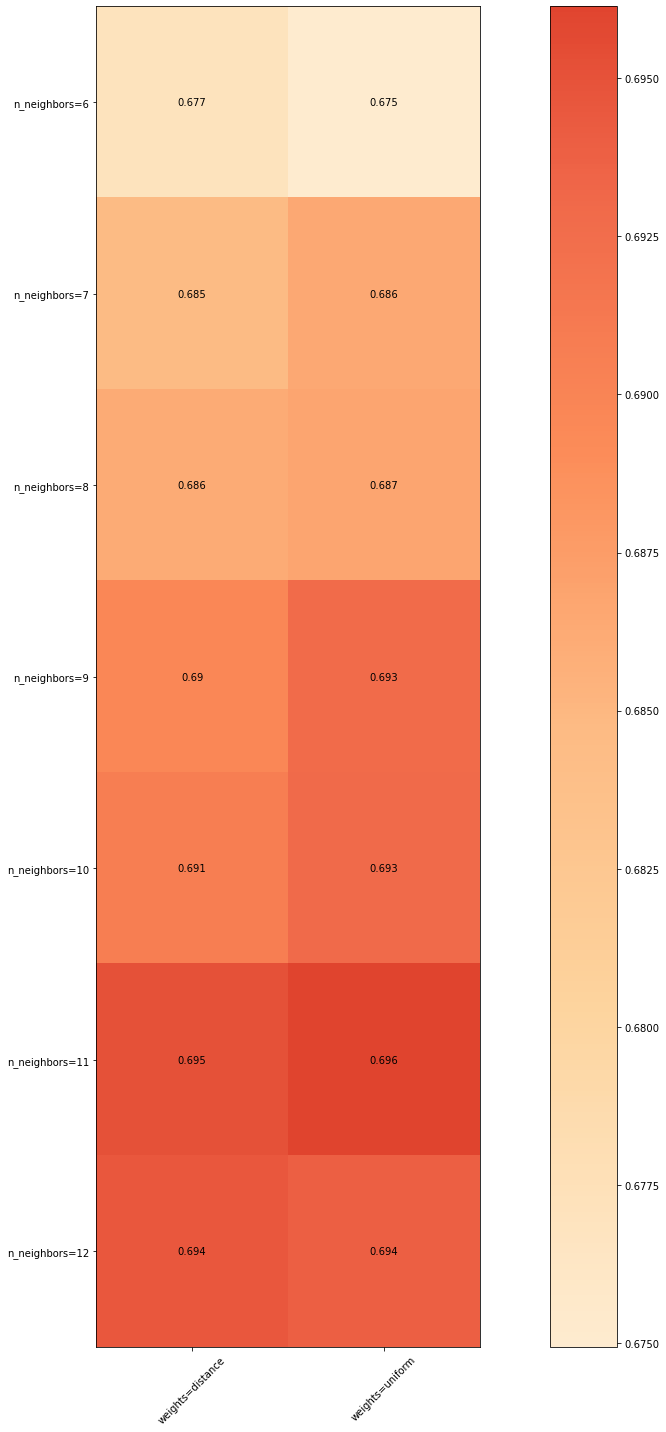

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

X = traindata_features
y = traindata_targets

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)


tuned_parameters = [{'n_neighbors': [6,7,8,9,10,11,12], 'weights': ['uniform', 'distance'],
                     'algorithm': ['ball_tree','kd_tree','brute']}]
#tuned_parameters = [{'n_neighbors': [13,14,15], 'weights': ['uniform', 'distance'],'algorithm':['ball_tree']}]

#scores = ['precision', 'recall']
scores = ['precision']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    

    clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    #sns.boxplot(x = means,y = stds)
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    cvplot = plot.grid_search(clf.cv_results_, change=('n_neighbors','weights'),subset={'algorithm': 'ball_tree'})
    
    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    print()


# Applying RandomForestClassifier

Using GridSearchCV to select below hyper parameters n_extimators, max_depth and max_features 



In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = traindata_features
y = traindata_targets

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)


tuned_parameters = [{'n_estimators': [100,150,200], 'max_depth': [None,100,50],
                     'max_features': ['sqrt','log2',15]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    

    clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    #sns.boxplot(x = means,y = stds)
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

Grid scores on development set:

0.709 (+/-0.011) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.707 (+/-0.008) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
0.714 (+/-0.006) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
0.706 (+/-0.004) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
0.709 (+/-0.008) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150}
0.710 (+/-0.004) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
0.709 (+/-0.010) for {'max_depth': None, 'max_features': 15, 'n_estimators': 100}
0.713 (+/-0.007) for {'max_depth': None, 'max_features': 15, 'n_estimators': 150}
0.712 (+/-0.010) for {'max_depth': None, 'max_features': 15, 'n_estimators': 200}
0.708 (+/-0.012) for {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}
0.706 (

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'max_depth': 100, 'max_features': 15, 'n_estimators': 200}

Grid scores on development set:

0.696 (+/-0.011) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.696 (+/-0.011) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
0.694 (+/-0.007) for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
0.691 (+/-0.013) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
0.688 (+/-0.006) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150}
0.691 (+/-0.005) for {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
0.694 (+/-0.016) for {'max_depth': None, 'max_features': 15, 'n_estimators': 100}
0.696 (+/-0.004) for {'max_depth': None, 'max_features': 15, 'n_estimators': 150}
0.697 (+/-0.008) for {'max_depth': None, 'max_features': 15, 'n_estimators': 200}
0.694 (+/-0.014) for {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}
0.696 (+/-0.

## Generating Precision-Recall Curve (KNN Classifier)
Constructing precision recall curve and calculating AUPRC score for the KNN classifier using k =8, weight = uniform, algorithm = ball_tree

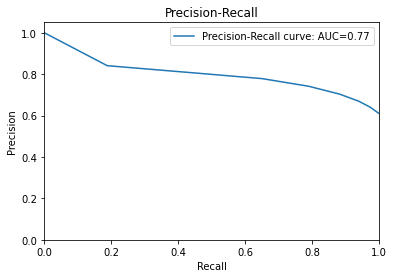

In [21]:
X = traindata_features
y = traindata_targets

#print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(type(y_train))

est = KNeighborsClassifier(n_neighbors=8,weights='uniform',algorithm='ball_tree')
est.fit(X_train, y_train)
y_pred = est.predict(X_test)


y_score = est.predict_proba(X_test)
y_true = y_test

plot.precision_recall(y_true, y_score)

## Generating Precision-Recall Curve (SVC Classifier)
Constructing precision recall curve and calculating AUPRC score for the SVC (Support Vector Classifier) classifier using C= 1000, kernel = linear

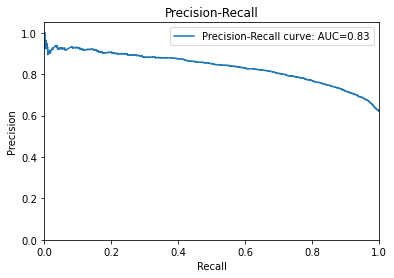

In [10]:
X = traindata_features
y = traindata_targets

#print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(type(y_train))

est = SVC(C=1000,kernel='linear',probability=True)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)


y_score = est.predict_proba(X_test)
y_true = y_test

plot.precision_recall(y_true, y_score)


## Generating Precision-Recall Curve (Random Forest Classifier)
Constructing precision recall curve and calculating AUPRC score for the SVC (Support Vector Classifier) classifier using max_depth = None, max_features= 'sqrt', n_estimators= 200

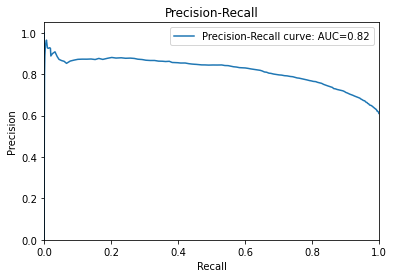

In [12]:
X = traindata_features
y = traindata_targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

est = RandomForestClassifier(max_depth=None,max_features='sqrt',n_estimators=200)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)


y_score = est.predict_proba(X_test)
y_true = y_test

plot.precision_recall(y_true, y_score)

# Performing prediction using the SVC classifier

Fitting the training data to the SVC classifier as it has highest AUC(0.83) with the selected hyper parameters 
C=1000 and kernel = linear

In [6]:
X = traindata_features
y = traindata_targets

est = SVC(C=1000,kernel='linear',probability=True)
est.fit(X, y)
y_pred = est.predict(test_dataset)



array([[0.17873013, 0.82126987],
       [0.61002706, 0.38997294],
       [0.60425424, 0.39574576],
       ...,
       [0.91798877, 0.08201123],
       [0.20740491, 0.79259509],
       [0.42052751, 0.57947249]])

In [ ]:
y_score = est.predict_proba(test_dataset)
y_score